# Exploratory Data Analysis

**Goal:** You work for a company that sells sculptures that are acquired from various artists around the world. Your task is to predict the cost required to ship these sculptures to customers based on the information provided in the dataset.

## Brainstorm

### Without looking at the data, what are some of the factors that could immediately affect shipping costs?

1. Distance:
    - the further away the source and destinations are, the higher the shipping costs
2. Weight
    - the higher the weight, the more the shipping costs
3. Dimensions
    - According to USPS [1], "Dimensional Weight Pricing charges more for large packages that weigh very little."
    - Since larger packages occupy more space, they are bound to increase packaging costs
    - This is also why major companies like Apple [2] prefer to cut down on packaging sizes.
4. Fragility
    - Fragile packages need to be handled carefully and hence need more time and patience from the ground staff
5. Price of item
    - The more valuable the item is, the more it's going to cost to insure the item
6. Mode of transport
    - air transportation being the most expensive, followed by water and then land

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
train_df = pd.read_csv(
    "data/train.csv", parse_dates=["Scheduled Date", "Delivery Date"]
)

<IPython.core.display.Javascript object>

## Data

### Data Description

The columns provided in the dataset are as follows:

| Column name           	| Description                                                                                                                                      	|
|-----------------------	|--------------------------------------------------------------------------------------------------------------------------------------------------	|
| Customer Id           	| Represents the unique identification number of the customers                                                                                     	|
| Artist Name           	| Represents the name of the artist                                                                                                                	|
| Artist Reputation     	| Represents the reputation of an artist in the market (the greater the   reputation value, the higher the reputation of the artist in the market) 	|
| Height                	| Represents the height of the sculpture                                                                                                           	|
| Width                 	| Represents the width of the sculpture                                                                                                            	|
| Weight                	| Represents the weight of the sculpture                                                                                                           	|
| Material              	| Represents the material that the sculpture is made of                                                                                            	|
| Price Of Sculpture    	| Represents the price of the sculpture                                                                                                            	|
| Base Shipping Price   	| Represents the base price for shipping a sculpture                                                                                               	|
| International         	| Represents whether the shipping is international                                                                                                 	|
| Express Shipment      	| Represents whether the shipping was in the express (fast) mode                                                                                   	|
| Installation Included 	| Represents whether the order had installation included in the purchase of   the sculpture                                                        	|
| Transport             	| Represents the mode of transport of the order                                                                                                    	|
| Fragile               	| Represents whether the order is fragile                                                                                                          	|
| Customer Information  	| Represents details about a customer                                                                                                              	|
| Remote Location       	| Represents whether the customer resides in a remote location                                                                                     	|
| Scheduled Date        	| Represents the date when the order was placed                                                                                                    	|
| Delivery Date         	| Represents the date of delivery of the order                                                                                                     	|
| Customer Location     	| Represents the location of the customer                                                                                                          	|
| Cost                  	| Represents the cost of the order                                                                                                                 	|

In [3]:
train_df.describe()

,Artist Reputation,Height,Width,Weight,Price Of Sculpture,Base Shipping Price,Cost
count,5750.000000,6125.000000,5916.000000,5.913000e+03,6500.00000,6500.000000,6.500000e+03
mean,0.461850,21.766204,9.617647,4.006948e+05,1192.42009,37.407174,1.713920e+04
std,0.265781,11.968192,5.417000,2.678081e+06,8819.61675,26.873519,2.406579e+05
min,0.000000,3.000000,2.000000,3.000000e+00,3.00000,10.000000,-8.801727e+05
25%,0.240000,12.000000,6.000000,5.030000e+02,5.23000,16.700000,1.884400e+02
50%,0.450000,20.000000,8.000000,3.102000e+03,8.02500,23.505000,3.820650e+02
75%,0.680000,30.000000,12.000000,3.645600e+04,89.47000,57.905000,1.156115e+03
max,1.000000,73.000000,50.000000,1.179279e+08,382385.67000,99.980000,1.114343e+07


<IPython.core.display.Javascript object>

In [4]:
train_df.head(1).T

,0
Customer Id,fffe3900350033003300
Artist Name,Billy Jenkins
Artist Reputation,0.26
Height,17.0
Width,6.0
Weight,4128.0
Material,Brass
Price Of Sculpture,13.91
Base Shipping Price,16.27
International,Yes


<IPython.core.display.Javascript object>

## Univariate Analysis

### `Artist Name`

In [5]:
train_df["Artist Name"].value_counts()

John Brown         4
James Moore        3
James White        3
Robert Davis       3
James Smith        2
                  ..
Alejandro Reyes    1
Linda Orellana     1
Mary Lopez         1
Mary Jones         1
Terri Whitaker     1
Name: Artist Name, Length: 6449, dtype: int64

<IPython.core.display.Javascript object>

There's no noticeable consistency in the artist's name; therefore, it's unlikely that this variable is likely to drive any insights.

### `Artist Reputation`

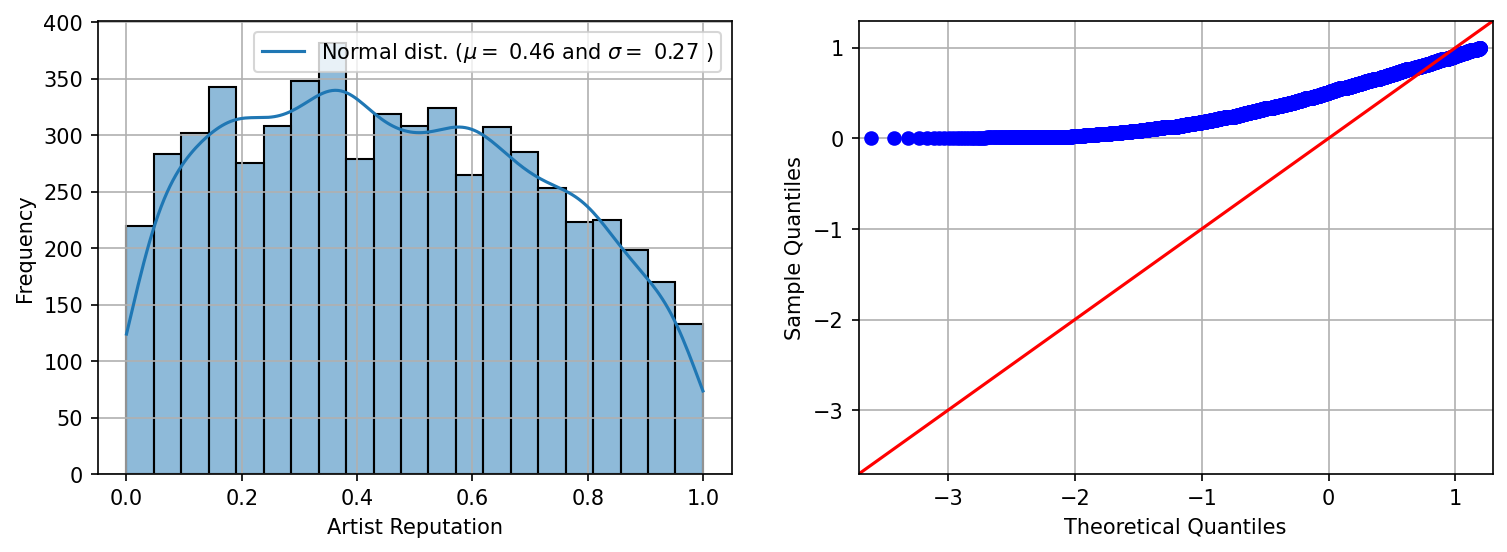

<IPython.core.display.Javascript object>

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4), dpi=150)

sns.histplot(train_df["Artist Reputation"], kde=True, ax=ax[0])

# Get the fitted parameters used by the function
(mu, sigma) = stats.norm.fit(
    data=train_df.loc[~train_df["Artist Reputation"].isna(), "Artist Reputation"]
)

# plot with the distribution
ax[0].legend(
    ["Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )".format(mu, sigma)], loc="best"
)
ax[0].set_ylabel("Frequency")
ax[0].grid()

# Probablity plot
sm.qqplot(data=train_df["Artist Reputation"], line="45", ax=ax[1])
ax[1].grid()
plt.show()

### Missing Info

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6500 entries, 0 to 6499
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Customer Id            6500 non-null   object        
 1   Artist Name            6500 non-null   object        
 2   Artist Reputation      5750 non-null   float64       
 3   Height                 6125 non-null   float64       
 4   Width                  5916 non-null   float64       
 5   Weight                 5913 non-null   float64       
 6   Material               5736 non-null   object        
 7   Price Of Sculpture     6500 non-null   float64       
 8   Base Shipping Price    6500 non-null   float64       
 9   International          6500 non-null   object        
 10  Express Shipment       6500 non-null   object        
 11  Installation Included  6500 non-null   object        
 12  Transport              5108 non-null   object        
 13  Fra

<IPython.core.display.Javascript object>

We can immediately identify some of the missing columns as:
* `Artist Reputation`
* `Height`
* `Width`
* `Weight`
* `Material`
* `Transport`
* `Remote Location`

Missing values "can have a significant effect on the conclusions that can be drawn from the data" [3]. We need to figure out whether to drop these or imputate them based on how they can impact the results drawn by our model.

## Treating Missing Data

This article Towards Data Science [4], explains the different ways the data can be missing. These are:
1. Missing at random - there is a systematic relationship between the propensity of missing values and the observed data, but not the missing data
2. Missing Completely at Random - no relationship between the missingness of the data and any values, observed or missing
3. Missing Not at Random - data is missing is related to the unobserved data

### Bivariate Analysis between column with missing values and target variable

The easiest to do is to check if there's a relationship between the missing values itself and the target variable

#### `Artist Reputation`

## References

1. [All About USPS Dimensional Weight Pricing](https://stamps.custhelp.com/app/answers/detail/a_id/6114/~/all-about-usps-dimensional-weight-pricing)
2. [Apple’s Paper and Packaging Strategy](https://www.apple.com/environment/pdf/Packaging_and_Forestry_September_2017.pdf)
3. [The prevention and handling of the missing data](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3668100/)
4. [How to Handle Missing Data](https://towardsdatascience.com/how-to-handle-missing-data-8646b18db0d4)
5. [qqplot (Quantile-Quantile Plot) in Python](https://www.geeksforgeeks.org/qqplot-quantile-quantile-plot-in-python/)